## Import the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset

In [15]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

# Implement the K-means algorithm

In [16]:


def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    np.random.seed(42)
    random_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[random_indices]
    return centroids

def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids."""
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            # Handle empty cluster by reinitializing randomly
            new_centroids[i] = data[np.random.choice(data.shape[0])]
    return new_centroids

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        # Step 1: Compute distances
        distances = compute_distances(data, centroids)

        # Step 2: Assign clusters
        clusters = assign_clusters(distances)

        # Step 3: Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters


# Evaluate the results

In [17]:
# Choose the number of clusters, K
k = 4

# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  69.93213076235043


# Visualize the clusters

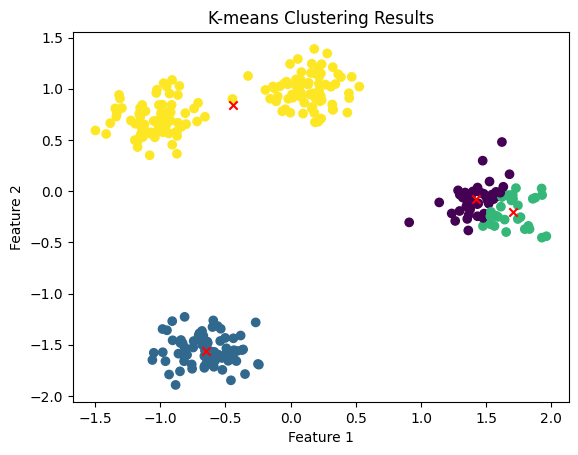

In [18]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [19]:


# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Drop rows with missing values (your file has some at the end)
df = df.dropna()

# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values


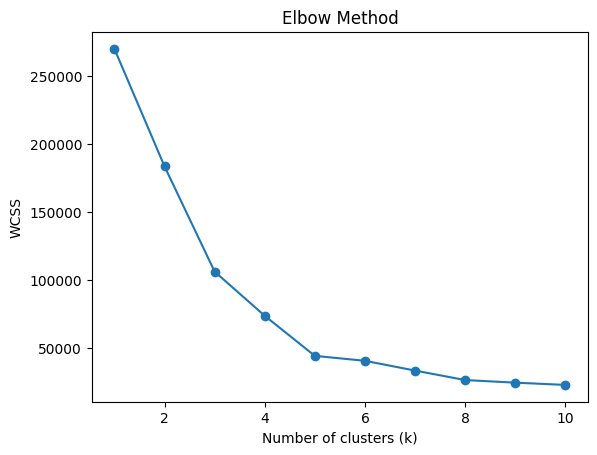

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

#5 is the optimal number of clusters

In [21]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df["Cluster"] = clusters

print(df.head())


   CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male  19.0                15.0                      39   
1           2    Male  21.0                15.0                      81   
2           3  Female  20.0                16.0                       6   
3           4  Female  23.0                16.0                      77   
4           5  Female  31.0                17.0                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
